In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_df=pd.read_csv("city_data.csv")
ride_df=pd.read_csv("ride_data.csv")
merge_df=pd.merge(city_df,ride_df,on="city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
driver_count = merge_df.groupby('city')['driver_count'].agg(lambda series: series.mode())
city_type = merge_df.groupby('city')['type'].agg(lambda series: series.mode())

fares = merge_df.groupby('city').mean()['fare']
counts = merge_df['city'].value_counts()

final_report=pd.DataFrame({"Type of City":city_type,
              "Total Number of Drivers": driver_count,
               "Total Number of Rides Per City":counts,
              "Fare ($) Per City": fares})

final_report1=pd.DataFrame({"Type of City":city_type,
              "Total Number of Drivers": driver_count,
               "Total Number of Rides Per City":counts,
              "Fare Per City": fares})


final_report=final_report.round(2)
final_report["Fare ($) Per City"]=final_report["Fare ($) Per City"].map("${:,.2f}".format)
final_report.head()

,Fare ($) Per City,Total Number of Drivers,Total Number of Rides Per City,Type of City
Alvarezhaven,$23.93,21,31,Urban
Alyssaberg,$20.61,67,26,Urban
Anitamouth,$37.32,16,9,Suburban
Antoniomouth,$23.62,21,22,Urban
Aprilchester,$21.98,49,19,Urban


In [4]:

final_report1['Total Number of Rides Per City']
final_report1['Fare Per City']
labels=city_df['type']

df_scatter = pd.DataFrame(dict(number_of_rides=final_report1['Total Number of Rides Per City'], fare=final_report1['Fare Per City'],
                               type_of_city=final_report1['Type of City'],total_driver=final_report1['Total Number of Drivers']))


In [5]:
df_scatter.head()
fig, ax = plt.subplots()
colors = {'Urban':'gold', 'Suburban':'lightskyblue', 'Rural':'lightcoral'}
ax.scatter(df_scatter['number_of_rides'], df_scatter['fare'], 
           c=df_scatter['type_of_city'].apply(lambda x: colors[x]),marker='o')

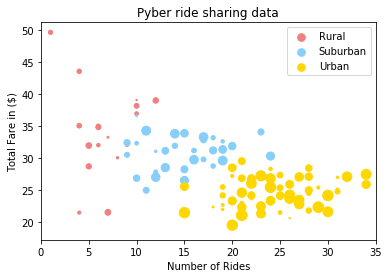

In [18]:
fig, ax = plt.subplots()

colors = {'Urban':'gold', 'Suburban':'lightskyblue', 'Rural':'lightcoral'}
s = [n*2 for n in range(int(max(merge_df['fare'])))]
grouped = df_scatter.groupby('type_of_city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='number_of_rides', y='fare', label=key, color=colors[key],marker='o',s=s)
plt.xlim(0,35)
plt.title("Pyber ride sharing data")
plt.xlabel("Number of Rides")
plt.ylabel("Total Fare in ($)")
plt.show()


In [7]:
total_rides_bytype=merge_df.groupby("type").count()["ride_id"]
total_fare_bytype= merge_df.groupby("type").sum()["fare"]
total_drivers_bytype=city_df.groupby("type").sum()["driver_count"]

total_fare=ride_df["fare"].sum()
total_rides=ride_df["ride_id"].count()
total_drivers=city_df["driver_count"].sum()

percentage_rides=total_rides_bytype/total_rides * 100
percentage_rides=percentage_rides.round(2)

percentage_fare=total_fare_bytype/total_fare * 100
percentage_fare=percentage_fare.round(2)

percentage_drivers=total_drivers_bytype/total_drivers * 100
percentage_drivers=percentage_drivers.round(2)

pie_frame=pd.DataFrame({"Total Rides": total_rides_bytype,
                       "Total Drivers":total_drivers_bytype,
                       "Total Fare": total_fare_bytype},dtype=object)

pie_frame=pie_frame.reset_index()
# pie_frame["Total Fare"]=pie_frame["Total Fare"].map("${:,.2f}".format)
pie_frame

,type,Total Drivers,Total Fare,Total Rides
0,Rural,104,4255.09,125
1,Suburban,638,20335.7,657
2,Urban,2607,40078.3,1625


In [8]:
city_type=list(pie_frame["type"])
drivers=list(pie_frame["Total Drivers"])
rides=list(pie_frame["Total Rides"])
fare=list(pie_frame["Total Fare"])
explode=[0, 0, .2]

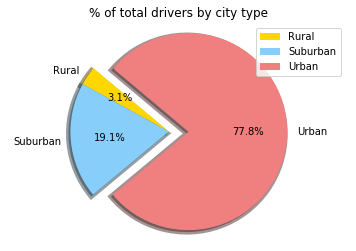

In [9]:
plt.pie(drivers,labels=city_type,explode=explode,autopct='%1.1f%%', colors=['gold', 'lightskyblue', 'lightcoral'],wedgeprops={'linewidth': 5}, shadow = True, startangle=140)
plt.title("% of total drivers by city type")
plt.legend()
plt.axis('equal')
plt.show()

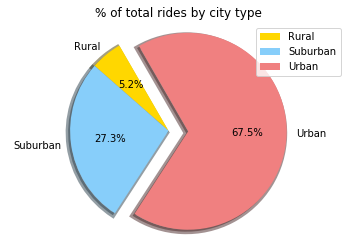

In [10]:
plt.pie(rides,labels=city_type,explode=explode,autopct='%1.1f%%', colors=['gold', 'lightskyblue', 'lightcoral'],
        wedgeprops={'linewidth': 5}, shadow = True, startangle=120)
plt.title("% of total rides by city type")
plt.axis('equal')
plt.legend()
plt.show()

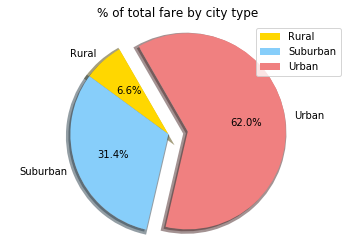

In [11]:
plt.pie(fare,labels=city_type,explode=explode,autopct='%1.1f%%',  colors=['gold', 'lightskyblue', 'lightcoral'],wedgeprops={'linewidth': 5}, shadow = True, startangle=120)
plt.title("% of total fare by city type")
plt.axis('equal')
plt.legend()
plt.show()